<a href="https://colab.research.google.com/github/clionelove123/Machine_Learning/blob/main/ML_Chap_09_Optimizer_Speed_Compare.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sys

assert sys.version_info >= (3, 7)

from packaging import version
import tensorflow as tf

assert version.parse(tf.__version__) >= version.parse("2.8.0")

# 추가 코드 - 패션 MNIST에서 옵티마이저를 테스트하는 간단한 함수

fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]
X_train, X_valid, X_test = X_train / 255, X_valid / 255, X_test / 255

def build_model(seed=42):
    tf.random.set_seed(seed)
    return tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=[28, 28]),
        tf.keras.layers.Dense(100, activation="relu",
                              kernel_initializer="he_normal"),
        tf.keras.layers.Dense(100, activation="relu",
                              kernel_initializer="he_normal"),
        tf.keras.layers.Dense(100, activation="relu",
                              kernel_initializer="he_normal"),
        tf.keras.layers.Dense(10, activation="softmax")
    ])

def build_and_train_model(optimizer):
    model = build_model()
    model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
                  metrics=["accuracy"])
    return model.fit(X_train, y_train, epochs=10,
                     validation_data=(X_valid, y_valid))

4422102/4422102 [==============================] - 0s 0us/step


In [2]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)
history_sgd = build_and_train_model(optimizer)  # 추가 코드

Epoch 1/10
1719/1719 [==============================] - 12s 7ms/step - loss: 0.6745 - accuracy: 0.7701 - val_loss: 0.5049 - val_accuracy: 0.8156
Epoch 2/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4576 - accuracy: 0.8399 - val_loss: 0.4383 - val_accuracy: 0.8426
Epoch 3/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4158 - accuracy: 0.8537 - val_loss: 0.4099 - val_accuracy: 0.8556
Epoch 4/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3908 - accuracy: 0.8624 - val_loss: 0.3827 - val_accuracy: 0.8634
Epoch 5/10
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3704 - accuracy: 0.8686 - val_loss: 0.3726 - val_accuracy: 0.8634
Epoch 6/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3583 - accuracy: 0.8720 - val_loss: 0.3731 - val_accuracy: 0.8660
Epoch 7/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3425 - accuracy: 0.8764 - val_loss: 0.3649 - val_accurac

In [3]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)
history_momentum = build_and_train_model(optimizer)

Epoch 1/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.7017 - accuracy: 0.7601 - val_loss: 0.5097 - val_accuracy: 0.8216
Epoch 2/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4657 - accuracy: 0.8362 - val_loss: 0.4384 - val_accuracy: 0.8432
Epoch 3/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4207 - accuracy: 0.8518 - val_loss: 0.4210 - val_accuracy: 0.8542
Epoch 4/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3938 - accuracy: 0.8624 - val_loss: 0.3868 - val_accuracy: 0.8608
Epoch 5/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3722 - accuracy: 0.8687 - val_loss: 0.3685 - val_accuracy: 0.8690
Epoch 6/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3575 - accuracy: 0.8728 - val_loss: 0.3772 - val_accuracy: 0.8648
Epoch 7/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3421 - accuracy: 0.8780 - val_loss: 0.3640 - val_accuracy:

In [4]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9,nesterov=True)
history_nesterov = build_and_train_model(optimizer)  # 추가 코드

Epoch 1/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.6662 - accuracy: 0.7734 - val_loss: 0.4887 - val_accuracy: 0.8238
Epoch 2/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4590 - accuracy: 0.8380 - val_loss: 0.4362 - val_accuracy: 0.8398
Epoch 3/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4171 - accuracy: 0.8517 - val_loss: 0.4015 - val_accuracy: 0.8560
Epoch 4/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3921 - accuracy: 0.8603 - val_loss: 0.3820 - val_accuracy: 0.8596
Epoch 5/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3718 - accuracy: 0.8684 - val_loss: 0.3717 - val_accuracy: 0.8610
Epoch 6/10
1719/1719 [==============================] - 8s 4ms/step - loss: 0.3584 - accuracy: 0.8714 - val_loss: 0.3743 - val_accuracy: 0.8648
Epoch 7/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3433 - accuracy: 0.8764 - val_loss: 0.3663 - val_accuracy:

In [5]:
optimizer = tf.keras.optimizers.Adagrad(learning_rate=0.001)
history_adagrad = build_and_train_model(optimizer)  # 추가 코드

Epoch 1/10
1719/1719 [==============================] - 7s 4ms/step - loss: 1.0160 - accuracy: 0.6821 - val_loss: 0.6807 - val_accuracy: 0.7844
Epoch 2/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.6358 - accuracy: 0.7936 - val_loss: 0.5793 - val_accuracy: 0.8136
Epoch 3/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.5664 - accuracy: 0.8133 - val_loss: 0.5331 - val_accuracy: 0.8222
Epoch 4/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.5303 - accuracy: 0.8231 - val_loss: 0.5086 - val_accuracy: 0.8290
Epoch 5/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.5069 - accuracy: 0.8296 - val_loss: 0.4900 - val_accuracy: 0.8326
Epoch 6/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4899 - accuracy: 0.8351 - val_loss: 0.4795 - val_accuracy: 0.8334
Epoch 7/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4770 - accuracy: 0.8376 - val_loss: 0.4664 - val_accuracy:

In [6]:
optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9)
history_rmsprop = build_and_train_model(optimizer)  # 추가 코드

Epoch 1/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.5107 - accuracy: 0.8151 - val_loss: 0.4280 - val_accuracy: 0.8354
Epoch 2/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3901 - accuracy: 0.8597 - val_loss: 0.4482 - val_accuracy: 0.8356
Epoch 3/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3630 - accuracy: 0.8685 - val_loss: 0.3673 - val_accuracy: 0.8698
Epoch 4/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3548 - accuracy: 0.8765 - val_loss: 0.3741 - val_accuracy: 0.8760
Epoch 5/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3458 - accuracy: 0.8788 - val_loss: 0.3949 - val_accuracy: 0.8608
Epoch 6/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3397 - accuracy: 0.8829 - val_loss: 0.3994 - val_accuracy: 0.8694
Epoch 7/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3383 - accuracy: 0.8825 - val_loss: 0.4093 - val_accuracy:

In [7]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9,beta_2=0.999)
history_adam = build_and_train_model(optimizer)  # 추가 코드

Epoch 1/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5038 - accuracy: 0.8198 - val_loss: 0.4364 - val_accuracy: 0.8290
Epoch 2/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3753 - accuracy: 0.8636 - val_loss: 0.3791 - val_accuracy: 0.8574
Epoch 3/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3422 - accuracy: 0.8738 - val_loss: 0.3449 - val_accuracy: 0.8766
Epoch 4/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3198 - accuracy: 0.8813 - val_loss: 0.3334 - val_accuracy: 0.8768
Epoch 5/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3002 - accuracy: 0.8894 - val_loss: 0.3348 - val_accuracy: 0.8764
Epoch 6/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2865 - accuracy: 0.8939 - val_loss: 0.3427 - val_accuracy: 0.8814
Epoch 7/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2744 - accuracy: 0.8978 - val_loss: 0.3259 - val_accuracy:

In [8]:
optimizer = tf.keras.optimizers.Adamax(learning_rate=0.001, beta_1=0.9,beta_2=0.999)
history_adamax = build_and_train_model(optimizer)  # 추가 코드

Epoch 1/10
1719/1719 [==============================] - 8s 4ms/step - loss: 0.5345 - accuracy: 0.8161 - val_loss: 0.4673 - val_accuracy: 0.8200
Epoch 2/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4036 - accuracy: 0.8573 - val_loss: 0.4175 - val_accuracy: 0.8420
Epoch 3/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3660 - accuracy: 0.8685 - val_loss: 0.3696 - val_accuracy: 0.8702
Epoch 4/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3391 - accuracy: 0.8774 - val_loss: 0.3446 - val_accuracy: 0.8750
Epoch 5/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3182 - accuracy: 0.8848 - val_loss: 0.3286 - val_accuracy: 0.8788
Epoch 6/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3038 - accuracy: 0.8895 - val_loss: 0.3338 - val_accuracy: 0.8772
Epoch 7/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.2903 - accuracy: 0.8924 - val_loss: 0.3354 - val_accuracy:

In [9]:
optimizer = tf.keras.optimizers.Nadam(learning_rate=0.001, beta_1=0.9,beta_2=0.999)
history_nadam = build_and_train_model(optimizer)  # 추가 코드

Epoch 1/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4870 - accuracy: 0.8263 - val_loss: 0.4286 - val_accuracy: 0.8392
Epoch 2/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3666 - accuracy: 0.8662 - val_loss: 0.3758 - val_accuracy: 0.8586
Epoch 3/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3325 - accuracy: 0.8778 - val_loss: 0.3560 - val_accuracy: 0.8734
Epoch 4/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3107 - accuracy: 0.8858 - val_loss: 0.3413 - val_accuracy: 0.8798
Epoch 5/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.2923 - accuracy: 0.8914 - val_loss: 0.3299 - val_accuracy: 0.8786
Epoch 6/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.2798 - accuracy: 0.8958 - val_loss: 0.3595 - val_accuracy: 0.8736
Epoch 7/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2666 - accuracy: 0.8995 - val_loss: 0.3692 - val_accuracy:

In [10]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

import sys
# 코랩의 경우 나눔 폰트를 설치합니다.
if 'google.colab' in sys.modules:
    !sudo apt-get -qq -y install fonts-nanum
    import matplotlib.font_manager as fm
    font_files = fm.findSystemFonts(fontpaths=['/usr/share/fonts/truetype/nanum'])
    for fpath in font_files:
        fm.fontManager.addfont(fpath)

# 나눔 폰트를 사용합니다.
import matplotlib

matplotlib.rc('font', family='NanumBarunGothic')
matplotlib.rcParams['axes.unicode_minus'] = False

debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 120875 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


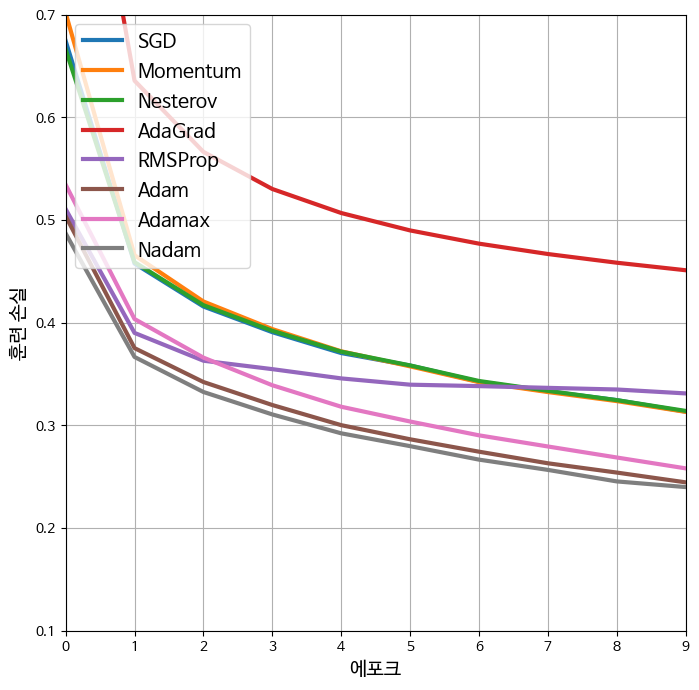

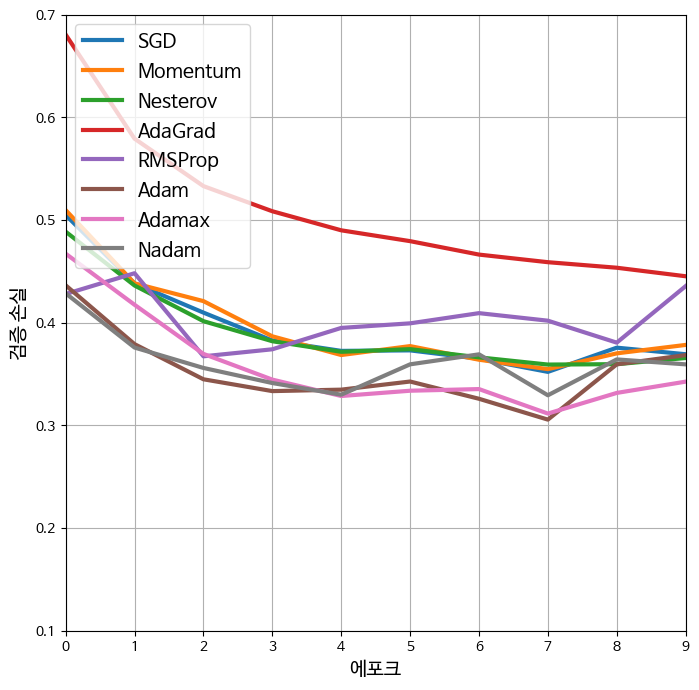

In [11]:
# 추가 코드 - 모든 옵티마이저의 학습 곡선 시각화

for loss in ("loss", "val_loss"):
    plt.figure(figsize=(8, 8))
    opt_names = "SGD Momentum Nesterov AdaGrad RMSProp Adam Adamax Nadam AdamW"
    for history, opt_name in zip((history_sgd, history_momentum, history_nesterov,
                                  history_adagrad, history_rmsprop, history_adam,
                                  history_adamax, history_nadam),
                                 opt_names.split()):
        plt.plot(history.history[loss], label=f"{opt_name}", linewidth=3)

    plt.grid()
    plt.xlabel("에포크")
    plt.ylabel({"loss": "훈련 손실", "val_loss": "검증 손실"}[loss])
    plt.legend(loc="upper left")
    plt.axis([0, 9, 0.1, 0.7])
    plt.show()